### >> Importaciones

In [22]:
import pandas as pd
import scorecardpy as sc
import numpy as np

In [23]:
def calcular_pesos(modelo):
    coef_model = pd.DataFrame(modelo.tvalues,columns=['t_value'])
    coef_model['t_value2'] = np.power(coef_model['t_value'], 2)
    coef_model['total'] = sum(coef_model['t_value2'])
    coef_model['part'] = coef_model['t_value2'] / coef_model['total']
    coef_model['pesos'] = coef_model['part'] * 100
    return coef_model['pesos'].sort_values(ascending=True)

### >> Load dataset

In [3]:
x_train = pd.read_csv("X_train.csv")
x_valid = pd.read_csv("X_valid.csv")

y_train = pd.read_csv("y_train.csv")
y_valid = pd.read_csv("y_valid.csv")

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((54315, 59), (9586, 59), (54315, 1), (9586, 1))

In [4]:
x_train.head(3)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,cuentas_otros_x_valor_prestamo,cuentas_otros_x_valor_prestamo_entre_tiempo_empleo,...,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo
0,1.0,0.041667,0.000341,0.827331,0.142857,0.411765,0.6125,0.267442,0.189594,0.105079,...,0.026910,0.337625,0.442476,0.221238,0.188728,0.219135,0.117486,0.270445,0.315009,0.165935
1,1.0,0.166667,0.000246,0.606498,0.142857,0.411765,0.5750,0.593023,0.138987,0.019258,...,0.204861,0.318311,0.420715,0.052589,0.394364,0.417064,0.055901,0.537402,0.570048,0.075070
2,1.0,0.062500,0.004814,0.306880,0.285714,0.352941,0.4625,0.383721,0.140652,0.051969,...,0.026693,0.223686,0.157051,0.104701,0.227156,0.128062,0.091545,0.291020,0.167333,0.117527


In [5]:
x_valid.head(3)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,cuentas_otros_x_valor_prestamo,cuentas_otros_x_valor_prestamo_entre_tiempo_empleo,...,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo
0,1.0,0.104167,0.000123,0.384329,0.285714,0.447059,0.4875,0.581395,0.176148,0.039051,...,0.062934,0.296152,0.197874,0.079150,0.416738,0.2193,0.094060,0.456495,0.246377,0.103826
1,1.0,0.104167,0.000049,0.473356,0.000000,0.588235,0.4375,0.325581,0.000000,0.000000,...,0.000000,0.353047,0.000000,0.091970,0.317677,0.0000,0.073612,0.235745,0.000000,0.059389
2,1.0,0.020833,0.000051,0.513038,0.142857,0.576471,0.4250,0.534884,0.117570,0.130321,...,0.023438,0.337476,0.442308,0.442308,0.486763,0.5060,0.542570,0.373845,0.413793,0.435942


In [6]:
y_train.fillna(-1).value_counts()

Incumplimiento
0                 46648
1                  7667
dtype: int64

In [7]:
y_valid.fillna(-1).value_counts()

Incumplimiento
0                 8233
1                 1353
dtype: int64

### >> CORRELACION

In [8]:
x_train['target'] = y_train.values
matriz_corr = x_train.corr(method='spearman')

matriz_corr.style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,cuentas_otros_x_valor_prestamo,cuentas_otros_x_valor_prestamo_entre_tiempo_empleo,cuentas_otros_x_saldo_cuenta,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,cuentas_otros_x_tiempo_empleo,cuentas_otros_x_autocontrol,cuentas_otros_x_autocontrol_entre_tiempo_empleo,cuentas_otros_x_impulsividad,cuentas_otros_x_impulsividad_entre_tiempo_empleo,cuentas_otros_x_confianza,cuentas_otros_x_confianza_entre_tiempo_empleo,valor_prestamo_x_saldo_cuenta,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,valor_prestamo_x_tiempo_empleo,valor_prestamo_x_tiempo_empleo_entre_cuentas_otros,valor_prestamo_x_autocontrol,valor_prestamo_x_autocontrol_entre_cuentas_otros,valor_prestamo_x_autocontrol_entre_tiempo_empleo,valor_prestamo_x_impulsividad,valor_prestamo_x_impulsividad_entre_cuentas_otros,valor_prestamo_x_impulsividad_entre_tiempo_empleo,valor_prestamo_x_confianza,valor_prestamo_x_confianza_entre_cuentas_otros,valor_prestamo_x_confianza_entre_tiempo_empleo,saldo_cuenta_x_tiempo_empleo,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,saldo_cuenta_x_autocontrol,saldo_cuenta_x_autocontrol_entre_cuentas_otros,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,saldo_cuenta_x_impulsividad,saldo_cuenta_x_impulsividad_entre_cuentas_otros,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,saldo_cuenta_x_confianza,saldo_cuenta_x_confianza_entre_cuentas_otros,saldo_cuenta_x_confianza_entre_tiempo_empleo,tiempo_empleo_x_autocontrol,tiempo_empleo_x_autocontrol_entre_cuentas_otros,tiempo_empleo_x_impulsividad,tiempo_empleo_x_impulsividad_entre_cuentas_otros,tiempo_empleo_x_confianza,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo,target
Empleado,1.00000,0.61396,0.00270,-0.00463,0.00038,0.00647,-0.00503,0.00187,0.00100,0.37668,0.00352,0.40968,0.40985,0.00056,0.40968,-0.00030,0.40968,0.00240,0.40968,-0.00100,0.00477,0.55301,0.55301,0.37668,0.00130,0.00623,0.55301,-0.00803,0.00553,0.55301,-0.00387,0.00695,0.55301,0.61240,0.40968,0.00316,0.00513,0.61240,0.00256,0.00529,0.61240,0.00274,0.00561,0.61240,0.61241,0.40968,0.61241,0.40968,0.61241,0.40968,0.00350,0.00673,0.61240,0.00651,0.00901,0.61240,-0.00215,0.00811,0.61240,-0.00068
Tiempo_empleo,0.61396,1.00000,0.00137,-0.00128,-0.00269,0.00448,-0.00591,0.00414,-0.00214,0.07964,0.00005,0.18811,0.48244,-0.00223,0.06322,-0.00396,0.06332,-0.00087,0.06351,0.00190,0.00308,0.21090,0.82414,0.41900,0.00242,0.00346,-0.07056,-0.00475,0.00274,-0.07105,0.00262,0.00449,-0.07084,0.60393,0.35276,0.00206,0.00222,0.21026,0.00077,0.00201,0.20995,0.00183,0.00255,0.21039,0.97466,0.47667,0.97450,0.47677,0.97491,0.47694,0.00055,0.00282,-0.13951,0.00725,0.00514,-0.13930,-0.00068,0.00378,-0.13988,0.00045
Saldo_cuenta,0.00270,0.00137,1.00000,0.00463,0.00004,-0.00199,0.00101,-0.00535,0.00514,0.00233,0.40260,0.27411,-0.00011,-0.00067,-0.00110,-0.00001,-0.00044,-0.00028,-0.00121,0.80612,0.33203,0.53533,0.00686,0.00329,0.00285,0.00101,0.00146,0.00390,0.00140,0.00271,-0.00064,0.00023,0.00016,0.66033,0.27418,0.99383,0.40024,0.65693,0.99388,0.40029,0.65678,0.99383,0.40017,0.65698,0.00084,-0.00069,0.00181,-0.00007,-0.00059,-0.00083,0.00076,-0.00226,0.00109,-0.00343,-0.00266,-0.00179,-0.00231,-0.00179,-0.00032,-0.00680
Valor_prestamo,-0.00463,-0.00128,0.00463,1.00000,-0.00142,0.00946,-0.00336,-0.00009,0.33035,0.20961,0.00072,-0.00127,-0.00161,0.00046,-0.00167,-0.00165,-0.00213,-0.00103,-0.00206,0.35265,0.21041,0.28273,0.37748,0.20886,0.79426,0.30338,0.37181,0.79252,0.30205,0.37082,0.79585,0.30271,0.37155,0.00031,-0.00060,0.00550,0.00141,0.00022,0.00407,0.00091,-0.00

In [9]:
pd.DataFrame(matriz_corr['target'].abs().sort_values(ascending=False)).style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,target
target,1.00000
saldo_cuenta_x_autocontrol,0.00702
saldo_cuenta_x_impulsividad,0.00698
Saldo_cuenta,0.00680
saldo_cuenta_x_confianza,0.00679
valor_prestamo_x_saldo_cuenta,0.00558
valor_prestamo_x_autocontrol,0.00537
autocontrol_x_impulsividad,0.00455
autocontrol_x_confianza,0.00423
cuentas_otros_x_confianza,0.00396


In [10]:
%%time

cortes = sc.woebin(
    x_train,
    y='target',
    method='tree',
    no_cores=4,
    count_distr_limit=0.05  # el 5% por bin es lo mínimo recomendable para arboles
)

[INFO] creating woe binning ...
Binning on 54315 rows and 60 columns in 00:03:35
Wall time: 3min 35s


In [11]:
dic_maxprob_corte = {}

for k, v in cortes.items():
    max_probabilidad_malo = v[v['bin'] != 'missing']['badprob'].max()
    max_iv = v['total_iv'].max()
    max_woe = v['woe'].max()
    
    dic_maxprob_corte[k] = [
        max_probabilidad_malo, max_iv, max_woe
    ]

In [12]:
listado_mayor_prob_corte = sorted([(k, v) for k, v in dic_maxprob_corte.items()], key=lambda _: _[1][1], reverse=True)
for row in listado_mayor_prob_corte:
    print("/"*20, row[0])
    #print("."*3, ' máxima prob malo: ', str(round(row[1][0]*100, 2)), " %")
    #print("."*3, ' máxima iv       : ', str(round(row[1][1], 5)))
    #print("."*3, ' máxima woe      : ', str(round(row[1][2], 5)))
    
    display(cortes[row[0]])

//////////////////// autocontrol_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_confianza_entre_tiempo_empleo,"[-inf,0.01)",8737,0.160858,7512,1225,0.140208,-0.007856,0.000010,0.003337,0.01,False
1,autocontrol_x_confianza_entre_tiempo_empleo,"[0.01,0.03)",3316,0.061051,2810,506,0.152593,0.091302,0.000526,0.003337,0.03,False
2,autocontrol_x_confianza_entre_tiempo_empleo,"[0.03,0.05)",7783,0.143294,6749,1034,0.132854,-0.070255,0.000690,0.003337,0.05,False
3,autocontrol_x_confianza_entre_tiempo_empleo,"[0.05,0.07)",7309,0.134567,6271,1038,0.142017,0.007065,0.000007,0.003337,0.07,False
4,autocontrol_x_confianza_entre_tiempo_empleo,"[0.07,0.11)",10286,0.189377,8763,1523,0.148065,0.055848,0.000603,0.003337,0.11,False
5,autocontrol_x_confianza_entre_tiempo_empleo,"[0.11,0.16)",6609,0.121679,5748,861,0.130277,-0.092808,0.001014,0.003337,0.16,False
6,autocontrol_x_confianza_entre_tiempo_empleo,"[0.16,0.34)",7229,0.133094,6162,1067,0.147600,0.052154,0.000369,0.003337,0.34,False
7,autocontrol_x_confianza_entre_tiempo_empleo,"[0.34,inf)",3046,0.056080,2633,413,0.135588,-0.046727,0.000120,0.003337,inf,False


//////////////////// saldo_cuenta_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[-inf,0.0002)",34207,0.629789,29331,4876,0.142544,0.011385,0.000082,0.002709,0.0002,False
1,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.0002,0.00030000000000000003)",3305,0.060849,2792,513,0.155219,0.111467,0.000787,0.002709,0.00030000000000000003,False
2,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.00030000000000000003,0.0006000000000000001)",5134,0.094523,4468,666,0.129723,-0.097702,0.000871,0.002709,0.0006000000000000001,False
3,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.0006000000000000001,0.001)",3146,0.057921,2700,446,0.141767,0.005017,0.000001,0.002709,0.001,False
4,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.001,0.0018000000000000002)",2875,0.052932,2448,427,0.148522,0.059462,0.000191,0.002709,0.0018000000000000002,False
5,saldo_cuenta_x_confianza_entre_tiempo_empleo,"[0.0018000000000000002,inf)",5648,0.103986,4909,739,0.130843,-0.087823,0.000777,0.002709,inf,False


//////////////////// autocontrol_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_impulsividad_entre_tiempo_empleo,"[-inf,0.09)",34049,0.626880,29212,4837,0.142060,0.007420,0.000035,0.002527,0.09,False
1,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.09,0.12)",5950,0.109546,5127,823,0.138319,-0.023615,0.000061,0.002527,0.12,False
2,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.12,0.16)",4682,0.086201,4076,606,0.129432,-0.100287,0.000836,0.002527,0.16,False
3,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.16,0.28)",5762,0.106085,4873,889,0.154287,0.104337,0.001199,0.002527,0.28,False
4,autocontrol_x_impulsividad_entre_tiempo_empleo,"[0.28,inf)",3872,0.071288,3360,512,0.132231,-0.075667,0.000397,0.002527,inf,False


//////////////////// valor_prestamo_x_saldo_cuenta


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_saldo_cuenta,"[-inf,0.0002)",29255,0.538617,25078,4177,0.142779,0.013307,0.000096,0.002314,0.0002,False
1,valor_prestamo_x_saldo_cuenta,"[0.0002,0.00030000000000000003)",3875,0.071343,3296,579,0.149419,0.066542,0.000324,0.002314,0.00030000000000000003,False
2,valor_prestamo_x_saldo_cuenta,"[0.00030000000000000003,0.0006000000000000001)",6281,0.115640,5441,840,0.133737,-0.062612,0.000443,0.002314,0.0006000000000000001,False
3,valor_prestamo_x_saldo_cuenta,"[0.0006000000000000001,0.001)",3858,0.071030,3266,592,0.153447,0.097890,0.000705,0.002314,0.001,False
4,valor_prestamo_x_saldo_cuenta,"[0.001,inf)",11046,0.203369,9567,1479,0.133895,-0.061249,0.000746,0.002314,inf,False


//////////////////// valor_prestamo_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[-inf,0.03)",16535,0.304428,14237,2298,0.138978,-0.018100,0.000099,0.002187,0.03,False
1,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.03,0.05)",6918,0.127368,5886,1032,0.149176,0.064627,0.000544,0.002187,0.05,False
2,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.05,0.06)",3354,0.061751,2897,457,0.136255,-0.041043,0.000102,0.002187,0.06,False
3,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.06,0.07)",3161,0.058198,2668,493,0.155963,0.117129,0.000832,0.002187,0.07,False
4,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.07,0.08)",2795,0.051459,2431,364,0.130233,-0.093199,0.000432,0.002187,0.08,False
5,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.08,0.16)",12216,0.224910,10528,1688,0.138179,-0.024789,0.000137,0.002187,0.16,False
6,valor_prestamo_x_impulsividad_entre_tiempo_empleo,"[0.16,inf)",9336,0.171886,8001,1335,0.142995,0.015069,0.000039,0.002187,inf,False


//////////////////// saldo_cuenta_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_autocontrol,"[-inf,0.0001)",15173,0.279352,12991,2182,0.143808,0.021690,0.000132,0.002162,0.0001,False
1,saldo_cuenta_x_autocontrol,"[0.0001,0.0002)",6880,0.126669,5931,949,0.137936,-0.026835,0.000090,0.002162,0.0002,False
2,saldo_cuenta_x_autocontrol,"[0.0002,0.00030000000000000003)",4302,0.079205,3648,654,0.152022,0.086878,0.000617,0.002162,0.00030000000000000003,False
3,saldo_cuenta_x_autocontrol,"[0.00030000000000000003,0.0007)",8912,0.164080,7677,1235,0.138577,-0.021453,0.000075,0.002162,0.0007,False
4,saldo_cuenta_x_autocontrol,"[0.0007,0.0012000000000000001)",4989,0.091853,4248,741,0.148527,0.059502,0.000332,0.002162,0.0012000000000000001,False
5,saldo_cuenta_x_autocontrol,"[0.0012000000000000001,0.0022)",4642,0.085464,4012,630,0.135717,-0.045621,0.000175,0.002162,0.0022,False
6,saldo_cuenta_x_autocontrol,"[0.0022,0.0035)",2919,0.053742,2500,419,0.143542,0.019530,0.000021,0.002162,0.0035,False
7,saldo_cuenta_x_autocontrol,"[0.0035,inf)",6498,0.119635,5641,857,0.131887,-0.078674,0.000720,0.002162,inf,False


//////////////////// Saldo_cuenta


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Saldo_cuenta,"[-inf,0.0004)",31411,0.578312,26928,4483,0.142721,0.012830,0.000096,0.002105,0.0004,False
1,Saldo_cuenta,"[0.0004,0.0006000000000000001)",4094,0.075375,3532,562,0.137274,-0.032413,0.000078,0.002105,0.0006000000000000001,False
2,Saldo_cuenta,"[0.0006000000000000001,0.001)",4744,0.087342,4019,725,0.152825,0.093088,0.000782,0.002105,0.001,False
3,Saldo_cuenta,"[0.001,0.0015)",3235,0.059560,2817,418,0.129212,-0.102242,0.000600,0.002105,0.0015,False
4,Saldo_cuenta,"[0.0015,0.003)",4520,0.083218,3880,640,0.141593,0.003582,0.000001,0.002105,0.003,False
5,Saldo_cuenta,"[0.003,inf)",6311,0.116193,5472,839,0.132942,-0.069484,0.000547,0.002105,inf,False


//////////////////// tiempo_empleo_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[-inf,0.01)",25857,0.476056,22240,3617,0.139885,-0.010543,0.000053,0.00204,0.01,False
1,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.01,0.03)",4166,0.076701,3586,580,0.139222,-0.016060,0.000020,0.00204,0.03,False
2,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.03,0.06)",6252,0.115106,5311,941,0.150512,0.075112,0.000667,0.00204,0.06,False
3,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.06,0.11)",7555,0.139096,6518,1037,0.137260,-0.032531,0.000145,0.00204,0.11,False
4,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.11,0.18)",5574,0.102624,4732,842,0.151058,0.079381,0.000665,0.00204,0.18,False
5,tiempo_empleo_x_impulsividad_entre_cuentas_otros,"[0.18,inf)",4911,0.090417,4261,650,0.132356,-0.074582,0.000490,0.00204,inf,False


//////////////////// valor_prestamo_x_autocontrol_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[-inf,0.04)",19904,0.366455,17130,2774,0.139369,-0.014836,0.000080,0.001982,0.04,False
1,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.04,0.07)",10350,0.190555,8821,1529,0.147729,0.053183,0.000549,0.001982,0.07,False
2,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.07,0.1)",7152,0.131676,6156,996,0.139262,-0.015731,0.000032,0.001982,0.1,False
3,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.1,0.12)",3434,0.063224,2933,501,0.145894,0.038530,0.000095,0.001982,0.12,False
4,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.12,0.2)",6998,0.128841,6074,924,0.132038,-0.077356,0.000750,0.001982,0.2,False
5,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.2,0.32)",3437,0.063279,2916,521,0.151586,0.083487,0.000454,0.001982,0.32,False
6,valor_prestamo_x_autocontrol_entre_tiempo_empleo,"[0.32,inf)",3040,0.055970,2618,422,0.138816,-0.019456,0.000021,0.001982,inf,False


//////////////////// valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[-inf,0.0001)",29117,0.536077,24996,4121,0.141532,0.003085,0.000005,0.001902,0.0001,False
1,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0001,0.0002)",5162,0.095038,4400,762,0.147617,0.052291,0.000265,0.001902,0.0002,False
2,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0002,0.0004)",5240,0.096474,4457,783,0.149427,0.066606,0.000438,0.001902,0.0004,False
3,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0004,0.0008)",4551,0.083789,3954,597,0.131180,-0.084861,0.000585,0.001902,0.0008,False
4,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0008,0.0014)",2975,0.054773,2542,433,0.145546,0.035736,0.000071,0.001902,0.0014,False
5,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,"[0.0014,inf)",7270,0.133849,6299,971,0.133563,-0.064115,0.000538,0.001902,inf,False


//////////////////// impulsividad_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,impulsividad_x_confianza_entre_tiempo_empleo,"[-inf,0.01)",8735,0.160821,7508,1227,0.140469,-0.005692,5.200342e-06,0.001871,0.01,False
1,impulsividad_x_confianza_entre_tiempo_empleo,"[0.01,0.05)",11206,0.206315,9581,1625,0.145012,0.031430,2.061214e-04,0.001871,0.05,False
2,impulsividad_x_confianza_entre_tiempo_empleo,"[0.05,0.06)",3930,0.072356,3419,511,0.130025,-0.095029,6.314048e-04,0.001871,0.06,False
3,impulsividad_x_confianza_entre_tiempo_empleo,"[0.06,0.09)",9315,0.171500,7972,1343,0.144176,0.024675,1.053473e-04,0.001871,0.09,False
4,impulsividad_x_confianza_entre_tiempo_empleo,"[0.09,0.11)",4288,0.078947,3719,569,0.132696,-0.071625,3.946955e-04,0.001871,0.11,False
5,impulsividad_x_confianza_entre_tiempo_empleo,"[0.11,0.2)",9536,0.175568,8192,1344,0.140940,-0.001803,5.704822e-07,0.001871,0.2,False
6,impulsividad_x_confianza_entre_tiempo_empleo,"[0.2,0.27)",2905,0.053484,2462,443,0.152496,0.090545,4.528924e-04,0.001871,0.27,False
7,impulsividad_x_confianza_entre_tiempo_empleo,"[0.27,inf)",4400,0.081009,3795,605,0.137500,-0.030507,7.456899e-05,0.001871,inf,False


//////////////////// cuentas_otros_x_autocontrol_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[-inf,0.02)",30962,0.570045,26642,4320,0.139526,-0.013529,0.000104,0.001686,0.02,False
1,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.02,0.03)",4685,0.086256,4000,685,0.146211,0.041074,0.000148,0.001686,0.03,False
2,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.03,0.04)",3529,0.064973,2984,545,0.154435,0.105470,0.000750,0.001686,0.04,False
3,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.04,0.05)",2803,0.051606,2441,362,0.129147,-0.102814,0.000526,0.001686,0.05,False
4,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.05,0.13)",8518,0.156826,7289,1229,0.144283,0.025539,0.000103,0.001686,0.13,False
5,cuentas_otros_x_autocontrol_entre_tiempo_empleo,"[0.13,inf)",3818,0.070294,3292,526,0.137768,-0.028245,0.000056,0.001686,inf,False


//////////////////// cuentas_otros_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[-inf,0.01)",26817,0.493731,23062,3755,0.140023,-0.009393,0.000043,0.001623,0.01,False
1,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.01,0.03)",10533,0.193924,9010,1523,0.144593,0.028052,0.000154,0.001623,0.03,False
2,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.03,0.04)",3637,0.066961,3118,519,0.142700,0.012661,0.000011,0.001623,0.04,False
3,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.04,0.05)",2740,0.050446,2400,340,0.124088,-0.148574,0.001055,0.001623,0.05,False
4,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.05,0.1)",6144,0.113118,5235,909,0.147949,0.054928,0.000348,0.001623,0.1,False
5,cuentas_otros_x_impulsividad_entre_tiempo_empleo,"[0.1,inf)",4444,0.081819,3823,621,0.139739,-0.011755,0.000011,0.001623,inf,False


//////////////////// saldo_cuenta_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_confianza,"[-inf,0.0001)",19045,0.350640,16294,2751,0.144447,0.026872,0.000256,0.001579,0.0001,False
1,saldo_cuenta_x_confianza,"[0.0001,0.0008)",21254,0.391310,18238,3016,0.141903,0.006129,0.000015,0.001579,0.0008,False
2,saldo_cuenta_x_confianza,"[0.0008,0.0014)",4366,0.080383,3797,569,0.130325,-0.092381,0.000664,0.001579,0.0014,False
3,saldo_cuenta_x_confianza,"[0.0014,0.003)",4415,0.081285,3775,640,0.144960,0.031017,0.000079,0.001579,0.003,False
4,saldo_cuenta_x_confianza,"[0.003,inf)",5235,0.096382,4544,691,0.131996,-0.077718,0.000566,0.001579,inf,False


//////////////////// valor_prestamo_x_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_tiempo_empleo,"[-inf,0.03)",17870,0.329007,15381,2489,0.139284,-0.015547,0.000079,0.001538,0.03,False
1,valor_prestamo_x_tiempo_empleo,"[0.03,0.05)",5615,0.103378,4778,837,0.149065,0.063751,0.000430,0.001538,0.05,False
2,valor_prestamo_x_tiempo_empleo,"[0.05,0.08)",8307,0.152941,7112,1195,0.143855,0.022067,0.000075,0.001538,0.08,False
3,valor_prestamo_x_tiempo_empleo,"[0.08,0.13)",10221,0.188180,8793,1428,0.139712,-0.011976,0.000027,0.001538,0.13,False
4,valor_prestamo_x_tiempo_empleo,"[0.13,0.16)",3959,0.072890,3372,587,0.148270,0.057468,0.000246,0.001538,0.16,False
5,valor_prestamo_x_tiempo_empleo,"[0.16,0.2)",3423,0.063021,2982,441,0.128834,-0.105600,0.000677,0.001538,0.2,False
6,valor_prestamo_x_tiempo_empleo,"[0.2,inf)",4920,0.090583,4230,690,0.140244,-0.007561,0.000005,0.001538,inf,False


//////////////////// saldo_cuenta_x_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_tiempo_empleo,"[-inf,0.0004)",35872,0.660444,30793,5079,0.141587,0.003532,0.000008,0.001537,0.0004,False
1,saldo_cuenta_x_tiempo_empleo,"[0.0004,0.0008)",5311,0.097781,4568,743,0.139898,-0.010430,0.000011,0.001537,0.0008,False
2,saldo_cuenta_x_tiempo_empleo,"[0.0008,0.0012000000000000001)",2780,0.051183,2344,436,0.156835,0.123733,0.000819,0.001537,0.0012000000000000001,False
3,saldo_cuenta_x_tiempo_empleo,"[0.0012000000000000001,0.0021000000000000003)",3146,0.057921,2693,453,0.143992,0.023186,0.000031,0.001537,0.0021000000000000003,False
4,saldo_cuenta_x_tiempo_empleo,"[0.0021000000000000003,inf)",7206,0.132671,6250,956,0.132667,-0.071874,0.000668,0.001537,inf,False


//////////////////// cuentas_otros_x_saldo_cuenta


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_saldo_cuenta,"[-inf,0.0005)",38861,0.715475,33356,5505,0.141659,0.004124,0.000012,0.001518,0.0005,False
1,cuentas_otros_x_saldo_cuenta,"[0.0005,0.0008)",3010,0.055417,2606,404,0.134219,-0.058452,0.000185,0.001518,0.0008,False
2,cuentas_otros_x_saldo_cuenta,"[0.0008,0.0013000000000000002)",2814,0.051809,2380,434,0.154229,0.103893,0.000580,0.001518,0.0013000000000000002,False
3,cuentas_otros_x_saldo_cuenta,"[0.0013000000000000002,0.0027)",3616,0.066575,3087,529,0.146294,0.041738,0.000118,0.001518,0.0027,False
4,cuentas_otros_x_saldo_cuenta,"[0.0027,inf)",6014,0.110724,5219,795,0.132192,-0.076014,0.000623,0.001518,inf,False


//////////////////// saldo_cuenta_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_impulsividad,"[-inf,0.00030000000000000003)",30293,0.557728,25983,4310,0.142277,0.009200,0.000047,0.001339,0.00030000000000000003,False
1,saldo_cuenta_x_impulsividad,"[0.00030000000000000003,0.0011)",12175,0.224155,10413,1762,0.144723,0.029099,0.000192,0.001339,0.0011,False
2,saldo_cuenta_x_impulsividad,"[0.0011,0.0018000000000000002)",3537,0.065120,3050,487,0.137687,-0.028928,0.000054,0.001339,0.0018000000000000002,False
3,saldo_cuenta_x_impulsividad,"[0.0018000000000000002,0.0031000000000000003)",3004,0.055307,2627,377,0.125499,-0.135648,0.000969,0.001339,0.0031000000000000003,False
4,saldo_cuenta_x_impulsividad,"[0.0031000000000000003,inf)",5306,0.097689,4575,731,0.137769,-0.028244,0.000077,0.001339,inf,False


//////////////////// valor_prestamo_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_impulsividad,"[-inf,0.2)",7029,0.129412,6056,973,0.138427,-0.022716,0.000066,0.001316,0.2,False
1,valor_prestamo_x_impulsividad,"[0.2,0.4)",24409,0.449397,20939,3470,0.142161,0.008246,0.000031,0.001316,0.4,False
2,valor_prestamo_x_impulsividad,"[0.4,0.5)",13457,0.247758,11496,1961,0.145723,0.037160,0.000347,0.001316,0.5,False
3,valor_prestamo_x_impulsividad,"[0.5,0.6000000000000001)",6648,0.122397,5737,911,0.137034,-0.034444,0.000143,0.001316,0.6000000000000001,False
4,valor_prestamo_x_impulsividad,"[0.6000000000000001,inf)",2772,0.051036,2420,352,0.126984,-0.122187,0.000729,0.001316,inf,False


//////////////////// cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[-inf,0.0001)",35055,0.645402,30149,4906,0.139952,-0.009988,0.000064,0.001253,0.0001,False
1,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[0.0001,0.0002)",3472,0.063923,2942,530,0.152650,0.091737,0.000556,0.001253,0.0002,False
2,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[0.0002,0.0009000000000000001)",7518,0.138415,6411,1107,0.147247,0.049343,0.000343,0.001253,0.0009000000000000001,False
3,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,"[0.0009000000000000001,inf)",8270,0.152260,7146,1124,0.135913,-0.043954,0.000290,0.001253,inf,False


//////////////////// tiempo_empleo_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_confianza,"[-inf,0.03)",12871,0.236970,11079,1792,0.139228,-0.016014,6.042537e-05,0.001246,0.03,False
1,tiempo_empleo_x_confianza,"[0.03,0.07)",10900,0.200681,9305,1595,0.146330,0.042026,3.598219e-04,0.001246,0.07,False
2,tiempo_empleo_x_confianza,"[0.07,0.09)",5351,0.098518,4615,736,0.137544,-0.030132,8.848686e-05,0.001246,0.09,False
3,tiempo_empleo_x_confianza,"[0.09,0.18)",15945,0.293565,13694,2251,0.141173,0.000121,4.328922e-09,0.001246,0.18,False
4,tiempo_empleo_x_confianza,"[0.18,0.22)",3460,0.063702,3011,449,0.129769,-0.097300,5.822992e-04,0.001246,0.22,False
5,tiempo_empleo_x_confianza,"[0.22,inf)",5788,0.106564,4944,844,0.145819,0.037927,1.553844e-04,0.001246,inf,False


//////////////////// saldo_cuenta_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_confianza_entre_cuentas_otros,"[-inf,0.0001)",34320,0.631870,29431,4889,0.142453,0.010644,0.000072,0.001231,0.0001,False
1,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0001,0.0002)",4611,0.084894,3987,624,0.135329,-0.048939,0.000200,0.001231,0.0002,False
2,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0002,0.0004)",4386,0.080751,3733,653,0.148883,0.062314,0.000321,0.001231,0.0004,False
3,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0004,0.0009000000000000001)",4203,0.077382,3655,548,0.130383,-0.091871,0.000632,0.001231,0.0009000000000000001,False
4,saldo_cuenta_x_confianza_entre_cuentas_otros,"[0.0009000000000000001,inf)",6795,0.125104,5842,953,0.140250,-0.007509,0.000007,0.001231,inf,False


//////////////////// saldo_cuenta_x_autocontrol_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[-inf,0.0002)",35898,0.660922,30775,5123,0.142710,0.012742,0.000108,0.001215,0.0002,False
1,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.0002,0.00030000000000000003)",3204,0.058989,2728,476,0.148564,0.059798,0.000215,0.001215,0.00030000000000000003,False
2,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.00030000000000000003,0.0005)",3731,0.068692,3237,494,0.132404,-0.074162,0.000368,0.001215,0.0005,False
3,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.0005,0.0008)",2855,0.052564,2445,410,0.143608,0.020061,0.000021,0.001215,0.0008,False
4,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.0008,0.0015)",3042,0.056007,2621,421,0.138396,-0.022974,0.000029,0.001215,0.0015,False
5,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,"[0.0015,inf)",5585,0.102826,4842,743,0.133035,-0.068682,0.000473,0.001215,inf,False


//////////////////// valor_prestamo_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[-inf,0.1)",24762,0.455896,21277,3485,0.140740,-0.003454,5.432104e-06,0.001067,0.1,False
1,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.1,0.2)",7649,0.140827,6523,1126,0.147209,0.049042,3.446988e-04,0.001067,0.2,False
2,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.2,0.30000000000000004)",7081,0.130369,6062,1019,0.143906,0.022487,6.645437e-05,0.001067,0.30000000000000004,False
3,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.30000000000000004,0.4)",6352,0.116947,5512,840,0.132242,-0.075576,6.500388e-04,0.001067,0.4,False
4,valor_prestamo_x_impulsividad_entre_cuentas_otros,"[0.4,inf)",8471,0.155961,7274,1197,0.141306,0.001217,2.309896e-07,0.001067,inf,False


//////////////////// tiempo_empleo_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_autocontrol,"[-inf,0.08)",32144,0.591807,27583,4561,0.141893,0.006047,0.000022,0.00106,0.08,False
1,tiempo_empleo_x_autocontrol,"[0.08,0.09)",2724,0.050152,2373,351,0.128855,-0.105419,0.000537,0.00106,0.09,False
2,tiempo_empleo_x_autocontrol,"[0.09,0.11)",4739,0.087250,4065,674,0.142224,0.008766,0.000007,0.00106,0.11,False
3,tiempo_empleo_x_autocontrol,"[0.11,0.14)",5258,0.096806,4538,720,0.136934,-0.035286,0.000119,0.00106,0.14,False
4,tiempo_empleo_x_autocontrol,"[0.14,0.18)",4269,0.078597,3631,638,0.149450,0.066780,0.000359,0.00106,0.18,False
5,tiempo_empleo_x_autocontrol,"[0.18,inf)",5181,0.095388,4458,723,0.139548,-0.013342,0.000017,0.00106,inf,False


//////////////////// valor_prestamo_x_autocontrol_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[-inf,0.1)",24674,0.454276,21206,3468,0.140553,-0.005001,0.000011,0.00105,0.1,False
1,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.1,0.2)",7348,0.135285,6250,1098,0.149428,0.066614,0.000615,0.00105,0.2,False
2,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.2,0.30000000000000004)",6885,0.126761,5958,927,0.134641,-0.054832,0.000374,0.00105,0.30000000000000004,False
3,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.30000000000000004,0.4)",6151,0.113247,5271,880,0.143066,0.015651,0.000028,0.00105,0.4,False
4,valor_prestamo_x_autocontrol_entre_cuentas_otros,"[0.4,inf)",9257,0.170432,7963,1294,0.139786,-0.011363,0.000022,0.00105,inf,False


//////////////////// valor_prestamo_x_tiempo_empleo_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[-inf,0.01)",29161,0.536887,25081,4080,0.139913,-0.010309,5.684654e-05,0.001024,0.01,False
1,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.01,0.04)",7497,0.138028,6384,1113,0.148459,0.058969,4.901999e-04,0.001024,0.04,False
2,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.04,0.07)",6032,0.111056,5181,851,0.141081,-0.000637,4.499461e-08,0.001024,0.07,False
3,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.07,0.11)",4960,0.091319,4236,724,0.145968,0.039121,1.417337e-04,0.001024,0.11,False
4,valor_prestamo_x_tiempo_empleo_entre_cuentas_o...,"[0.11,inf)",6665,0.122710,5766,899,0.134884,-0.052746,3.349813e-04,0.001024,inf,False


//////////////////// tiempo_empleo_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_confianza_entre_cuentas_otros,"[-inf,0.02)",27890,0.513486,23984,3906,0.140050,-0.009168,0.000043,0.001008,0.02,False
1,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.02,0.05)",7068,0.130130,6027,1041,0.147284,0.049637,0.000326,0.001008,0.05,False
2,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.05,0.09)",7067,0.130111,6095,972,0.137541,-0.030164,0.000117,0.001008,0.09,False
3,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.09,0.12)",3652,0.067237,3102,550,0.150602,0.075821,0.000397,0.001008,0.12,False
4,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.12,0.16)",3133,0.057682,2708,425,0.135653,-0.046172,0.000121,0.001008,0.16,False
5,tiempo_empleo_x_confianza_entre_cuentas_otros,"[0.16,inf)",5505,0.101353,4732,773,0.140418,-0.006120,0.000004,0.001008,inf,False


//////////////////// cuentas_otros_x_valor_prestamo_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[-inf,0.01)",29626,0.545448,25487,4139,0.139708,-0.012010,0.000078,0.000869,0.01,False
1,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.01,0.02)",5135,0.094541,4398,737,0.143525,0.019387,0.000036,0.000869,0.02,False
2,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.02,0.04)",7535,0.138728,6435,1100,0.145985,0.039263,0.000217,0.000869,0.04,False
3,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.04,0.06)",4239,0.078045,3674,565,0.133286,-0.066506,0.000337,0.000869,0.06,False
4,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.06,0.09)",3254,0.059910,2772,482,0.148125,0.056324,0.000194,0.000869,0.09,False
5,cuentas_otros_x_valor_prestamo_entre_tiempo_em...,"[0.09,inf)",4526,0.083329,3882,644,0.142289,0.009298,0.000007,0.000869,inf,False


//////////////////// cuentas_otros_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_confianza_entre_tiempo_empleo,"[-inf,0.01)",26636,0.490399,22917,3719,0.139623,-0.012720,7.897829e-05,0.000865,0.01,False
1,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.01,0.02)",5362,0.098720,4611,751,0.140060,-0.009090,8.130024e-06,0.000865,0.02,False
2,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.02,0.03)",4732,0.087121,4018,714,0.150888,0.078048,5.457068e-04,0.000865,0.03,False
3,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.03,0.06)",8489,0.156292,7313,1176,0.138532,-0.021830,7.389955e-05,0.000865,0.06,False
4,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.06,0.09)",3741,0.068876,3191,550,0.147020,0.047533,1.582896e-04,0.000865,0.09,False
5,cuentas_otros_x_confianza_entre_tiempo_empleo,"[0.09,inf)",5355,0.098592,4598,757,0.141363,0.001691,2.821577e-07,0.000865,inf,False


//////////////////// valor_prestamo_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_autocontrol,"[-inf,0.1)",5556,0.102292,4787,769,0.138409,-0.022864,0.000053,0.000864,0.1,False
1,valor_prestamo_x_autocontrol,"[0.1,0.30000000000000004)",14703,0.270699,12574,2129,0.144800,0.029726,0.000242,0.000864,0.30000000000000004,False
2,valor_prestamo_x_autocontrol,"[0.30000000000000004,0.4)",17344,0.319322,14863,2481,0.143047,0.015491,0.000077,0.000864,0.4,False
3,valor_prestamo_x_autocontrol,"[0.4,0.5)",11347,0.208911,9811,1536,0.135366,-0.048618,0.000485,0.000864,0.5,False
4,valor_prestamo_x_autocontrol,"[0.5,inf)",5365,0.098776,4613,752,0.140168,-0.008193,0.000007,0.000864,inf,False


//////////////////// valor_prestamo_x_confianza_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_confianza_entre_tiempo_empleo,"[-inf,0.01)",13483,0.248237,11608,1875,0.139064,-0.017381,0.000075,0.000851,0.01,False
1,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.01,0.04)",10580,0.194790,9039,1541,0.145652,0.036588,0.000264,0.000851,0.04,False
2,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.04,0.05)",4440,0.081745,3842,598,0.134685,-0.054453,0.000238,0.000851,0.05,False
3,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.05,0.06)",3748,0.069005,3199,549,0.146478,0.043210,0.000131,0.000851,0.06,False
4,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.06,0.1)",9698,0.178551,8334,1364,0.140648,-0.004217,0.000003,0.000851,0.1,False
5,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.1,0.16)",6129,0.112842,5285,844,0.137706,-0.028771,0.000092,0.000851,0.16,False
6,valor_prestamo_x_confianza_entre_tiempo_empleo,"[0.16,inf)",6237,0.114830,5341,896,0.143659,0.020477,0.000049,0.000851,inf,False


//////////////////// saldo_cuenta_x_autocontrol_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[-inf,0.0001)",31750,0.584553,27238,4512,0.142110,0.007832,0.000036,0.000805,0.0001,False
1,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.0001,0.0002)",4476,0.082408,3864,612,0.136729,-0.037021,0.000111,0.000805,0.0002,False
2,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.0002,0.0006000000000000001)",7073,0.130222,6033,1040,0.147038,0.047681,0.000301,0.000805,0.0006000000000000001,False
3,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.0006000000000000001,0.0012000000000000001)",3717,0.068434,3219,498,0.133979,-0.060521,0.000245,0.000805,0.0012000000000000001,False
4,saldo_cuenta_x_autocontrol_entre_cuentas_otros,"[0.0012000000000000001,inf)",7299,0.134383,6294,1005,0.137690,-0.028905,0.000111,0.000805,inf,False


//////////////////// saldo_cuenta_x_impulsividad_entre_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,"[-inf,0.0006000000000000001)",45079,0.829955,38649,6430,0.142638,0.012158,0.000123,0.000805,0.0006000000000000001,False
1,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,"[0.0006000000000000001,0.0012000000000000001)",3515,0.064715,3034,481,0.136842,-0.036065,0.000083,0.000805,0.0012000000000000001,False
2,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,"[0.0012000000000000001,inf)",5721,0.105330,4965,756,0.132145,-0.076423,0.000598,0.000805,inf,False


//////////////////// Autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Autocontrol,"[-inf,0.30000000000000004)",2749,0.050612,2358,391,0.142234,0.008843,0.000004,0.000792,0.30000000000000004,False
1,Autocontrol,"[0.30000000000000004,0.4)",8165,0.150327,6976,1189,0.145622,0.036342,0.000201,0.000792,0.4,False
2,Autocontrol,"[0.4,0.5)",17483,0.321882,15088,2395,0.136990,-0.034812,0.000385,0.000792,0.5,False
3,Autocontrol,"[0.5,0.6000000000000001)",16633,0.306232,14237,2396,0.144051,0.023661,0.000173,0.000792,0.6000000000000001,False
4,Autocontrol,"[0.6000000000000001,inf)",9285,0.170947,7989,1296,0.139580,-0.013078,0.000029,0.000792,inf,False


//////////////////// autocontrol_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_confianza_entre_cuentas_otros,"[-inf,0.1)",21260,0.391420,18255,3005,0.141345,0.001543,9.326735e-07,0.000773,0.1,False
1,autocontrol_x_confianza_entre_cuentas_otros,"[0.1,0.2)",8207,0.151100,7022,1185,0.144389,0.026399,1.063064e-04,0.000773,0.2,False
2,autocontrol_x_confianza_entre_cuentas_otros,"[0.2,0.4)",14507,0.267090,12479,2028,0.139795,-0.011292,3.392164e-05,0.000773,0.4,False
3,autocontrol_x_confianza_entre_cuentas_otros,"[0.4,0.5)",5982,0.110135,5179,803,0.134236,-0.058308,3.666636e-04,0.000773,0.5,False
4,autocontrol_x_confianza_entre_cuentas_otros,"[0.5,inf)",4359,0.080254,3713,646,0.148199,0.056909,2.652561e-04,0.000773,inf,False


//////////////////// valor_prestamo_x_saldo_cuenta_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[-inf,0.0001)",36331,0.668894,31185,5146,0.141642,0.003987,1.064890e-05,0.000625,0.0001,False
1,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0001,0.0002)",4161,0.076609,3575,586,0.140832,-0.002696,5.562919e-07,0.000625,0.0002,False
2,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0002,0.0004)",3921,0.072190,3339,582,0.148432,0.058748,2.544461e-04,0.000625,0.0004,False
3,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0004,0.0007)",2748,0.050594,2360,388,0.141194,0.000293,4.346577e-09,0.000625,0.0007,False
4,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,"[0.0007,inf)",7154,0.131713,6189,965,0.134890,-0.052696,3.588815e-04,0.000625,inf,False


//////////////////// autocontrol_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_confianza,"[-inf,0.30000000000000004)",13533,0.249158,11573,1960,0.144831,0.029974,0.000226,0.000623,0.30000000000000004,False
1,autocontrol_x_confianza,"[0.30000000000000004,0.4)",17220,0.317039,14813,2407,0.139779,-0.011419,0.000041,0.000623,0.4,False
2,autocontrol_x_confianza,"[0.4,0.5)",14042,0.258529,12108,1934,0.137730,-0.028571,0.000209,0.000623,0.5,False
3,autocontrol_x_confianza,"[0.5,0.6000000000000001)",6667,0.122747,5722,945,0.141743,0.004816,0.000003,0.000623,0.6000000000000001,False
4,autocontrol_x_confianza,"[0.6000000000000001,inf)",2853,0.052527,2432,421,0.147564,0.051868,0.000144,0.000623,inf,False


//////////////////// tiempo_empleo_x_autocontrol_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[-inf,0.01)",26601,0.489754,22877,3724,0.139995,-0.009629,0.000045,0.000616,0.01,False
1,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.01,0.05)",12050,0.221854,10330,1720,0.142739,0.012977,0.000038,0.000616,0.05,False
2,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.05,0.11)",9603,0.176802,8210,1393,0.145059,0.031811,0.000181,0.000616,0.11,False
3,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.11,0.16)",3321,0.061143,2882,439,0.132189,-0.076036,0.000344,0.000616,0.16,False
4,tiempo_empleo_x_autocontrol_entre_cuentas_otros,"[0.16,inf)",2740,0.050446,2349,391,0.142701,0.012667,0.000008,0.000616,inf,False


//////////////////// cuentas_otros_x_tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_tiempo_empleo,"[-inf,0.03)",31567,0.581184,27157,4410,0.139703,-0.012056,0.000084,0.000604,0.03,False
1,cuentas_otros_x_tiempo_empleo,"[0.03,0.05)",4838,0.089073,4125,713,0.147375,0.050365,0.000230,0.000604,0.05,False
2,cuentas_otros_x_tiempo_empleo,"[0.05,0.1)",9734,0.179214,8380,1354,0.139100,-0.017080,0.000052,0.000604,0.1,False
3,cuentas_otros_x_tiempo_empleo,"[0.1,0.15)",4181,0.076977,3581,600,0.143506,0.019237,0.000029,0.000604,0.15,False
4,cuentas_otros_x_tiempo_empleo,"[0.15,inf)",3995,0.073552,3405,590,0.147685,0.052827,0.000209,0.000604,inf,False


//////////////////// autocontrol_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_impulsividad_entre_cuentas_otros,"[-inf,0.1)",21072,0.387959,18119,2953,0.140139,-0.008435,0.000028,0.000579,0.1,False
1,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.1,0.2)",7875,0.144988,6712,1163,0.147683,0.052811,0.000412,0.000579,0.2,False
2,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.2,0.4)",14445,0.265949,12432,2013,0.139356,-0.014943,0.000059,0.000579,0.4,False
3,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.4,0.5)",5888,0.108405,5072,816,0.138587,-0.021371,0.000049,0.000579,0.5,False
4,autocontrol_x_impulsividad_entre_cuentas_otros,"[0.5,inf)",5035,0.092700,4313,722,0.143396,0.018341,0.000031,0.000579,inf,False


//////////////////// valor_prestamo_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_confianza,"[-inf,0.2)",8979,0.165313,7738,1241,0.138211,-0.024521,9.852849e-05,0.000434,0.2,False
1,valor_prestamo_x_confianza,"[0.2,0.30000000000000004)",14455,0.266133,12368,2087,0.144379,0.026320,1.861054e-04,0.000434,0.30000000000000004,False
2,valor_prestamo_x_confianza,"[0.30000000000000004,0.4)",17943,0.330351,15398,2545,0.141838,0.005598,1.037198e-05,0.000434,0.4,False
3,valor_prestamo_x_confianza,"[0.4,0.5)",9502,0.174942,8193,1309,0.137760,-0.028312,1.388090e-04,0.000434,0.5,False
4,valor_prestamo_x_confianza,"[0.5,inf)",3436,0.063261,2951,485,0.141153,-0.000046,1.328967e-10,0.000434,inf,False


//////////////////// saldo_cuenta_x_impulsividad_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[-inf,0.0002)",38646,0.711516,33145,5501,0.142343,0.009743,6.777321e-05,0.00041,0.0002,False
1,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[0.0002,0.0007)",7495,0.137991,6436,1059,0.141294,0.001122,1.739359e-07,0.00041,0.0007,False
2,saldo_cuenta_x_impulsividad_entre_cuentas_otros,"[0.0007,inf)",8174,0.150492,7067,1107,0.135429,-0.048078,3.418947e-04,0.00041,inf,False


//////////////////// autocontrol_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,autocontrol_x_impulsividad,"[-inf,0.2)",6968,0.128289,5969,999,0.143370,0.018125,0.000042,0.00036,0.2,False
1,autocontrol_x_impulsividad,"[0.2,0.4)",35767,0.658511,30691,5076,0.141919,0.006259,0.000026,0.00036,0.4,False
2,autocontrol_x_impulsividad,"[0.4,0.5)",8498,0.156458,7317,1181,0.138974,-0.018134,0.000051,0.00036,0.5,False
3,autocontrol_x_impulsividad,"[0.5,inf)",3082,0.056743,2671,411,0.133355,-0.065910,0.000241,0.00036,inf,False


//////////////////// cuentas_otros_x_valor_prestamo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_valor_prestamo,"[-inf,0.1)",27640,0.508883,23775,3865,0.139834,-0.010968,0.000061,0.000344,0.1,False
1,cuentas_otros_x_valor_prestamo,"[0.1,0.2)",15885,0.292461,13614,2271,0.142965,0.014826,0.000065,0.000344,0.2,False
2,cuentas_otros_x_valor_prestamo,"[0.2,0.30000000000000004)",6533,0.120280,5627,906,0.138681,-0.020588,0.000051,0.000344,0.30000000000000004,False
3,cuentas_otros_x_valor_prestamo,"[0.30000000000000004,inf)",4257,0.078376,3632,625,0.146817,0.045918,0.000168,0.000344,inf,False


//////////////////// Valor_prestamo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Valor_prestamo,"[-inf,0.2)",5607,0.103231,4833,774,0.138042,-0.025946,0.000069,0.000337,0.2,False
1,Valor_prestamo,"[0.2,0.4)",7097,0.130664,6076,1021,0.143864,0.022141,0.000065,0.000337,0.4,False
2,Valor_prestamo,"[0.4,0.6000000000000001)",30034,0.552960,25759,4275,0.142339,0.009705,0.000052,0.000337,0.6000000000000001,False
3,Valor_prestamo,"[0.6000000000000001,inf)",11577,0.213146,9980,1597,0.137946,-0.026752,0.000151,0.000337,inf,False


//////////////////// impulsividad_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,impulsividad_x_confianza_entre_cuentas_otros,"[-inf,0.1)",21151,0.389414,18188,2963,0.140088,-0.008855,0.000030,0.000298,0.1,False
1,impulsividad_x_confianza_entre_cuentas_otros,"[0.1,0.2)",8105,0.149222,6928,1177,0.145219,0.033102,0.000165,0.000298,0.2,False
2,impulsividad_x_confianza_entre_cuentas_otros,"[0.2,0.30000000000000004)",7622,0.140330,6532,1090,0.143007,0.015169,0.000032,0.000298,0.30000000000000004,False
3,impulsividad_x_confianza_entre_cuentas_otros,"[0.30000000000000004,0.4)",6943,0.127828,5982,961,0.138413,-0.022831,0.000066,0.000298,0.4,False
4,impulsividad_x_confianza_entre_cuentas_otros,"[0.4,inf)",10494,0.193206,9018,1476,0.140652,-0.004182,0.000003,0.000298,inf,False


//////////////////// Cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Cuentas_otros,"[-inf,0.1428571428571428)",19846,0.365387,17059,2787,0.140431,-0.006008,0.000013,0.000275,0.1428571428571428,False
1,Cuentas_otros,"[0.1428571428571428,0.2857142857142857)",20100,0.370064,17290,2810,0.139801,-0.011239,0.000047,0.000275,0.2857142857142857,False
2,Cuentas_otros,"[0.2857142857142857,0.4285714285714285)",9946,0.183117,8526,1420,0.142771,0.013241,0.000032,0.000275,0.4285714285714285,False
3,Cuentas_otros,"[0.4285714285714285,inf)",4423,0.081432,3773,650,0.146959,0.047051,0.000183,0.000275,inf,False


//////////////////// cuentas_otros_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_confianza,"[-inf,0.2)",44439,0.818172,38207,6232,0.140237,-0.007617,0.000047,0.000271,0.2,False
1,cuentas_otros_x_confianza,"[0.2,0.30000000000000004)",6923,0.127460,5922,1001,0.144590,0.028030,0.000101,0.000271,0.30000000000000004,False
2,cuentas_otros_x_confianza,"[0.30000000000000004,inf)",2953,0.054368,2519,434,0.146969,0.047132,0.000123,0.000271,inf,False


//////////////////// impulsividad_x_confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,impulsividad_x_confianza,"[-inf,0.30000000000000004)",15410,0.283715,13247,2163,0.140363,-0.006570,0.000012,0.000268,0.30000000000000004,False
1,impulsividad_x_confianza,"[0.30000000000000004,0.4)",17229,0.317205,14766,2463,0.142957,0.014758,0.000069,0.000268,0.4,False
2,impulsividad_x_confianza,"[0.4,0.5)",13036,0.240007,11181,1855,0.142298,0.009373,0.000021,0.000268,0.5,False
3,impulsividad_x_confianza,"[0.5,inf)",8640,0.159072,7454,1186,0.137269,-0.032460,0.000166,0.000268,inf,False


//////////////////// valor_prestamo_x_confianza_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,valor_prestamo_x_confianza_entre_cuentas_otros,"[-inf,0.1)",25910,0.477032,22255,3655,0.141065,-0.000766,2.797953e-07,0.000258,0.1,False
1,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.1,0.2)",9138,0.168241,7821,1317,0.144123,0.024249,9.978850e-05,0.000258,0.2,False
2,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.2,0.30000000000000004)",7738,0.142465,6638,1100,0.142156,0.008204,9.617241e-06,0.000258,0.30000000000000004,False
3,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.30000000000000004,0.4)",6769,0.124625,5824,945,0.139607,-0.012853,2.049322e-05,0.000258,0.4,False
4,valor_prestamo_x_confianza_entre_cuentas_otros,"[0.4,inf)",4760,0.087637,4110,650,0.136555,-0.038501,1.281226e-04,0.000258,inf,False


//////////////////// tiempo_empleo_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,tiempo_empleo_x_impulsividad,"[-inf,0.1)",29948,0.551376,25714,4234,0.141378,0.001816,1.820009e-06,0.000251,0.1,False
1,tiempo_empleo_x_impulsividad,"[0.1,0.2)",15799,0.290877,13570,2229,0.141085,-0.000604,1.060130e-07,0.000251,0.2,False
2,tiempo_empleo_x_impulsividad,"[0.2,0.30000000000000004)",5787,0.106545,4993,794,0.137204,-0.033004,1.146878e-04,0.000251,0.30000000000000004,False
3,tiempo_empleo_x_impulsividad,"[0.30000000000000004,inf)",2781,0.051201,2371,410,0.147429,0.050795,1.345279e-04,0.000251,inf,False


//////////////////// cuentas_otros_x_impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_impulsividad,"[-inf,0.1)",28058,0.516579,24138,3920,0.139711,-0.011991,0.000074,0.00022,0.1,False
1,cuentas_otros_x_impulsividad,"[0.1,0.2)",16041,0.295333,13770,2271,0.141575,0.003433,0.000003,0.00022,0.2,False
2,cuentas_otros_x_impulsividad,"[0.2,0.30000000000000004)",7065,0.130075,6042,1023,0.144798,0.029709,0.000116,0.00022,0.30000000000000004,False
3,cuentas_otros_x_impulsividad,"[0.30000000000000004,inf)",3151,0.058013,2698,453,0.143764,0.021331,0.000027,0.00022,inf,False


//////////////////// saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[-inf,0.0001)",36231,0.667053,31114,5117,0.141233,0.000615,2.524344e-07,0.000161,0.0001,False
1,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[0.0001,0.0002)",3514,0.064697,3028,486,0.138304,-0.023744,3.616573e-05,0.000161,0.0002,False
2,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[0.0002,0.0007)",6321,0.116377,5407,914,0.144597,0.028086,9.272602e-05,0.000161,0.0007,False
3,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,"[0.0007,inf)",8249,0.151873,7099,1150,0.139411,-0.014487,3.171022e-05,0.000161,inf,False


//////////////////// Impulsividad


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Impulsividad,"[-inf,0.4)",14130,0.260149,12126,2004,0.141826,0.005498,0.000008,0.00015,0.4,False
1,Impulsividad,"[0.4,0.5)",16450,0.302863,14099,2351,0.142918,0.014442,0.000063,0.00015,0.5,False
2,Impulsividad,"[0.5,inf)",23735,0.436988,20423,3312,0.139541,-0.013405,0.000078,0.00015,inf,False


//////////////////// cuentas_otros_x_autocontrol


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,cuentas_otros_x_autocontrol,"[-inf,0.1)",24487,0.450833,21050,3437,0.140360,-0.006597,0.000020,0.000112,0.1,False
1,cuentas_otros_x_autocontrol,"[0.1,0.2)",17810,0.327902,15290,2520,0.141494,0.002765,0.000003,0.000112,0.2,False
2,cuentas_otros_x_autocontrol,"[0.2,0.30000000000000004)",7700,0.141766,6617,1083,0.140649,-0.004202,0.000002,0.000112,0.30000000000000004,False
3,cuentas_otros_x_autocontrol,"[0.30000000000000004,inf)",4318,0.079499,3691,627,0.145206,0.032998,0.000088,0.000112,inf,False


//////////////////// Confianza


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Confianza,"[-inf,0.4)",12254,0.225610,10530,1724,0.140689,-0.003877,0.000003,0.000095,0.4,False
1,Confianza,"[0.4,0.5)",18129,0.333775,15555,2574,0.141982,0.006784,0.000015,0.000095,0.5,False
2,Confianza,"[0.5,0.6000000000000001)",14591,0.268637,12519,2072,0.142005,0.006971,0.000013,0.000095,0.6000000000000001,False
3,Confianza,"[0.6000000000000001,inf)",9341,0.171978,8044,1297,0.138850,-0.019168,0.000063,0.000095,inf,False


//////////////////// Empleado


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Empleado,"[-inf,1.0)",8150,0.150051,6995,1155,0.141718,0.004609,3.193317e-06,0.000004,1.0,False
1,Empleado,"[1.0,inf)",46165,0.849949,39653,6512,0.141059,-0.000815,5.648485e-07,0.000004,inf,False


//////////////////// Tiempo_empleo


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Tiempo_empleo,"[-inf,0.1)",28613,0.526797,24579,4034,0.140985,-0.001429,1.075688e-06,0.000004,0.1,False
1,Tiempo_empleo,"[0.1,0.2)",17662,0.325177,15168,2494,0.141207,0.000405,5.322674e-08,0.000004,0.2,False
2,Tiempo_empleo,"[0.2,inf)",8040,0.148025,6901,1139,0.141667,0.004189,2.601422e-06,0.000004,inf,False


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\woebin.py:1209: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


{'tiempo_empleo_x_impulsividad_entre_cuentas_otros': <Figure size 432x288 with 2 Axes>,
 'cuentas_otros_x_valor_prestamo_entre_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'autocontrol_x_impulsividad_entre_cuentas_otros': <Figure size 432x288 with 2 Axes>,
 'saldo_cuenta_x_confianza_entre_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'cuentas_otros_x_valor_prestamo': <Figure size 432x288 with 2 Axes>,
 'valor_prestamo_x_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'valor_prestamo_x_confianza': <Figure size 432x288 with 2 Axes>,
 'cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'tiempo_empleo_x_autocontrol': <Figure size 432x288 with 2 Axes>,
 'valor_prestamo_x_impulsividad_entre_cuentas_otros': <Figure size 432x288 with 2 Axes>,
 'cuentas_otros_x_saldo_cuenta': <Figure size 432x288 with 2 Axes>,
 'saldo_cuenta_x_tiempo_empleo': <Figure size 432x288 with 2 Axes>,
 'valor_prestamo_x_autocontrol_entre_cuentas_otros': <Figure size 

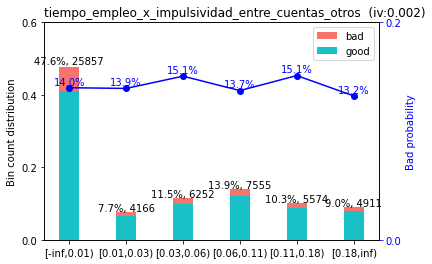

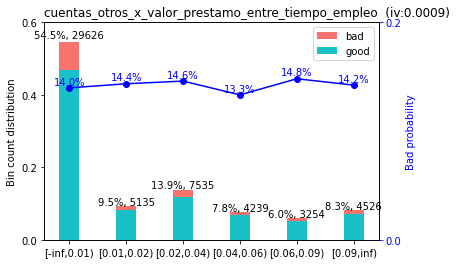

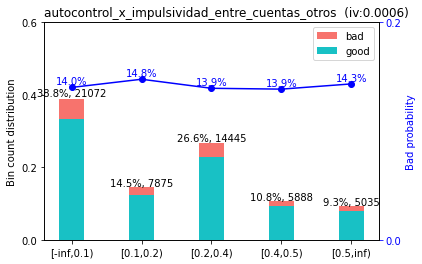

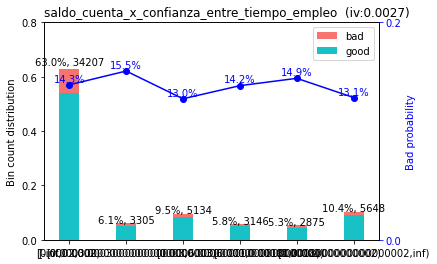

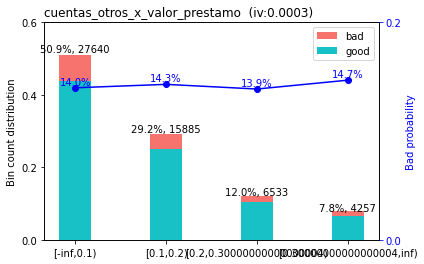

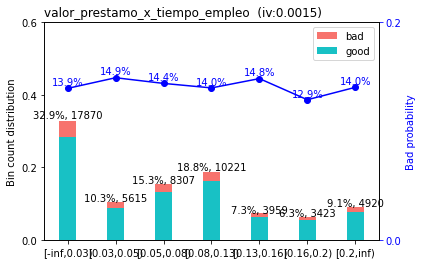

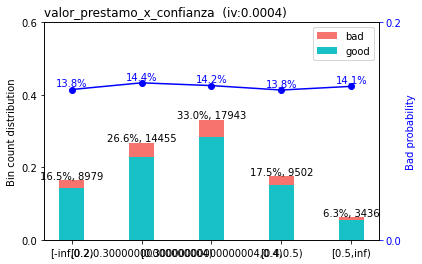

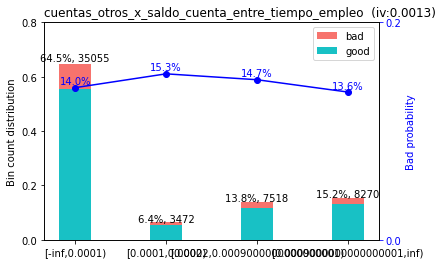

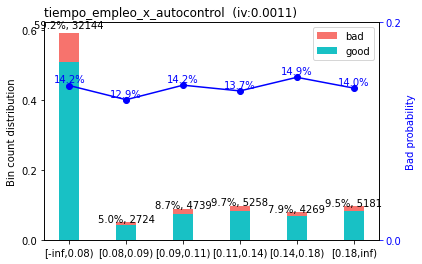

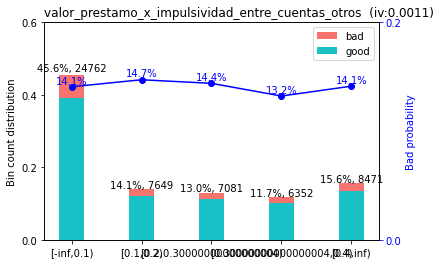

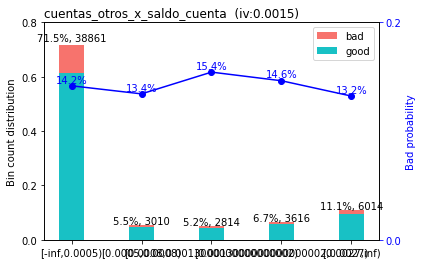

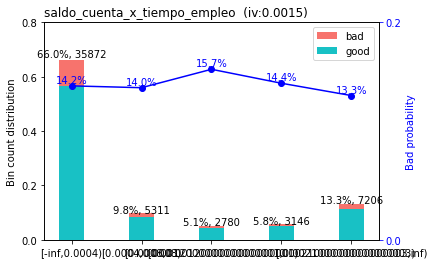

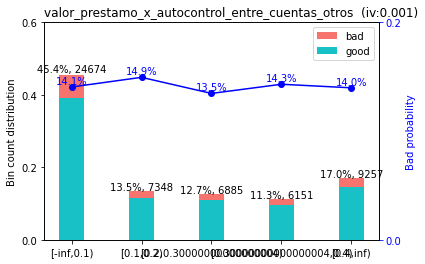

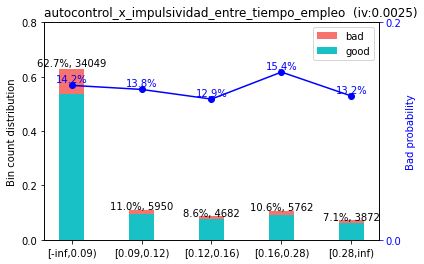

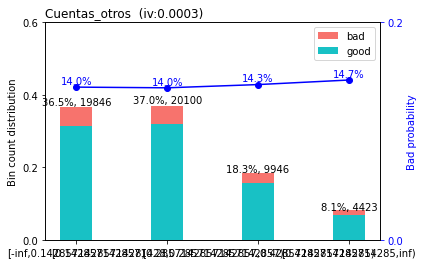

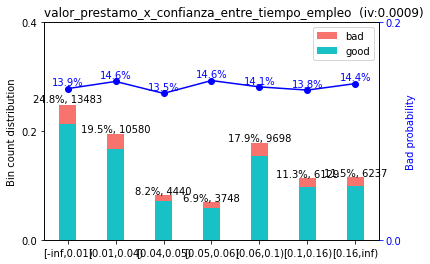

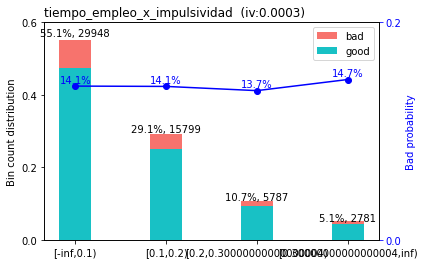

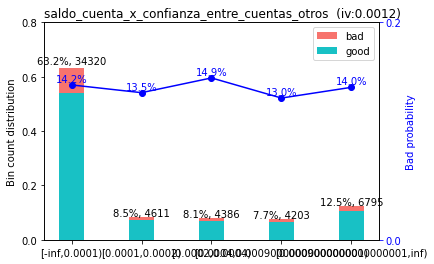

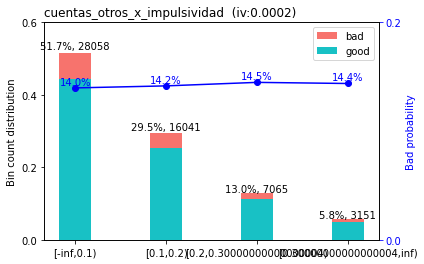

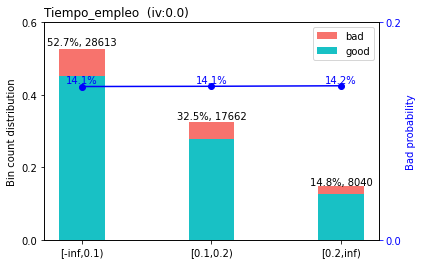

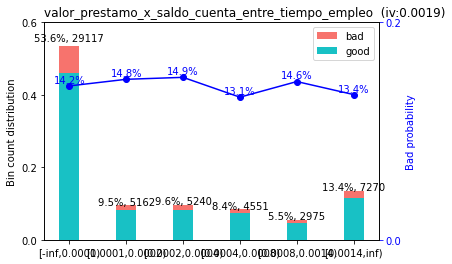

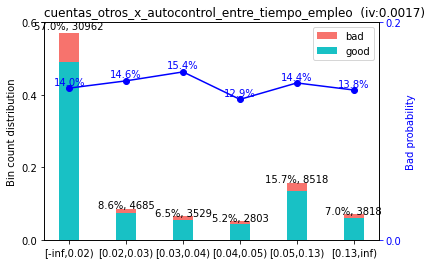

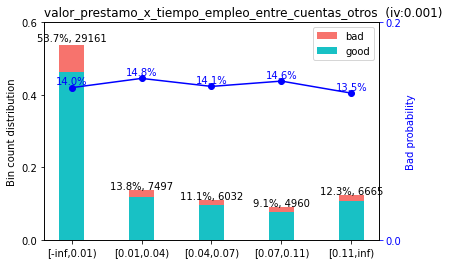

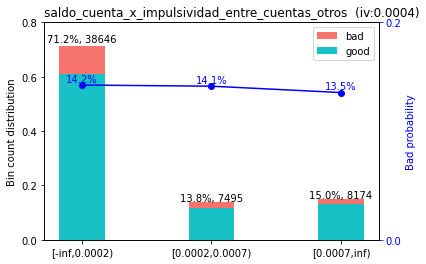

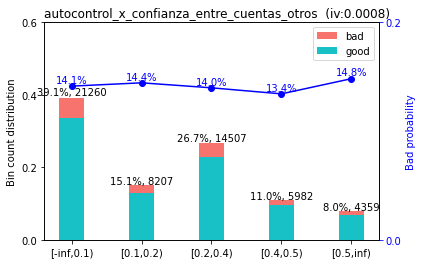

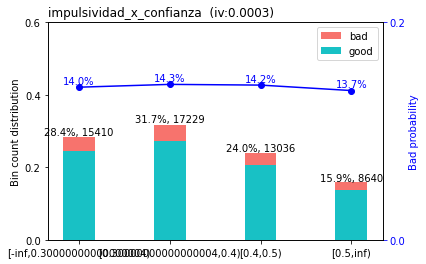

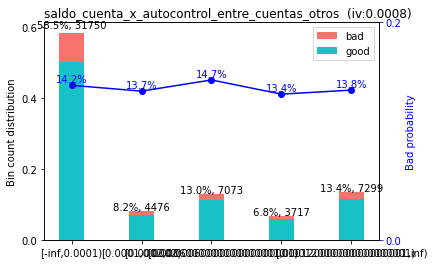

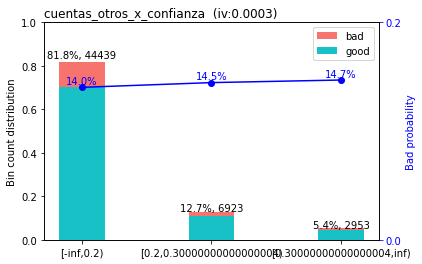

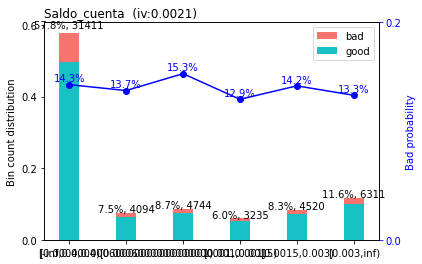

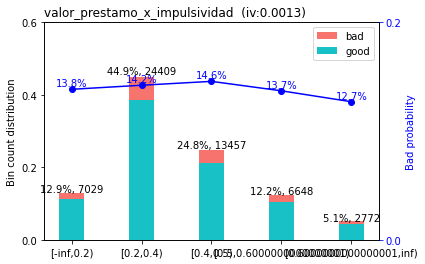

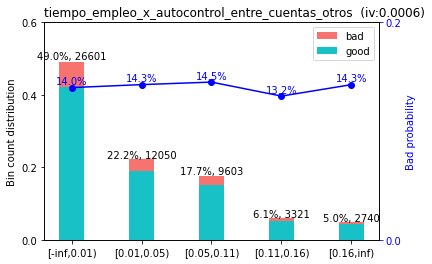

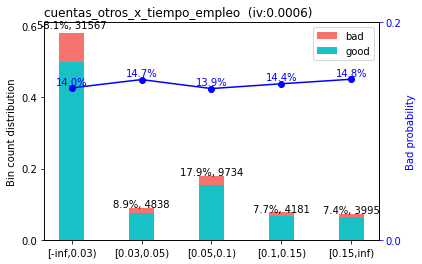

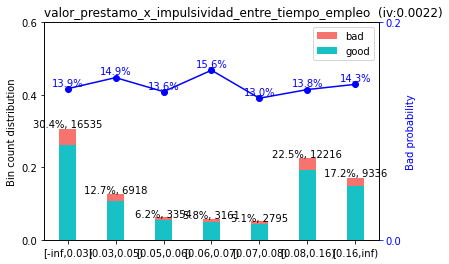

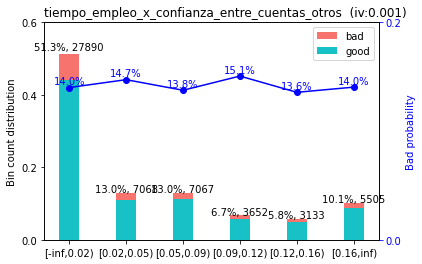

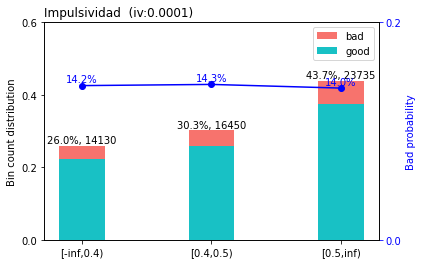

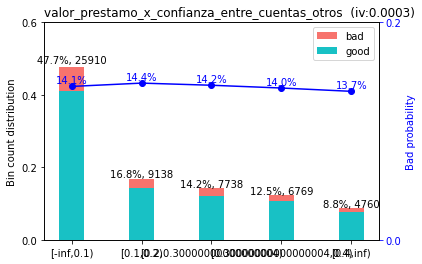

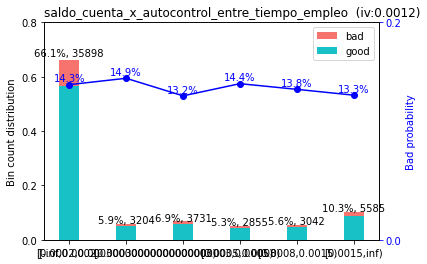

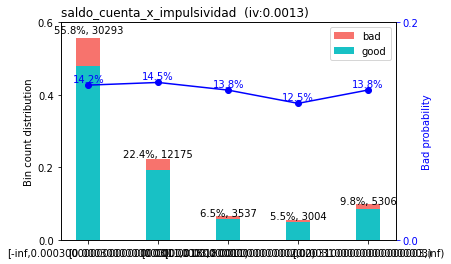

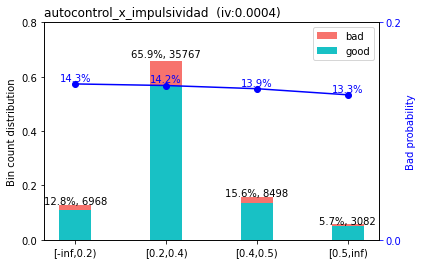

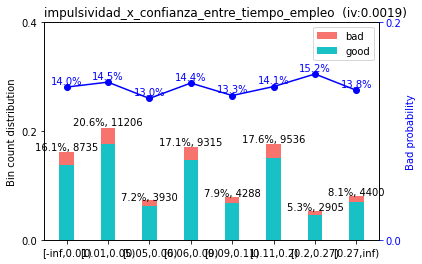

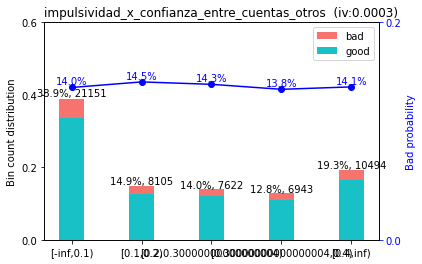

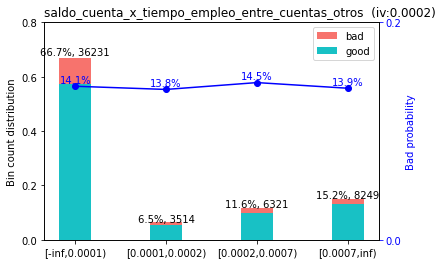

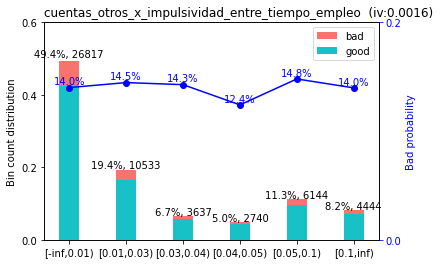

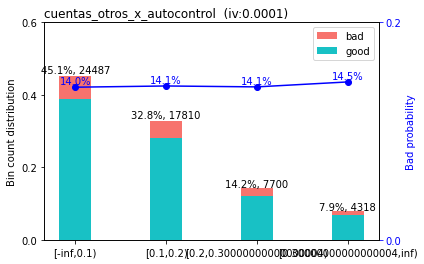

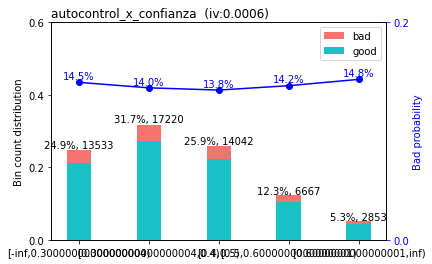

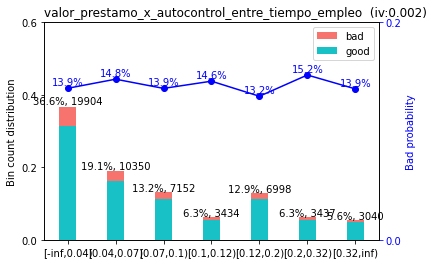

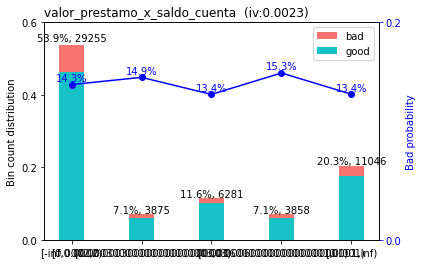

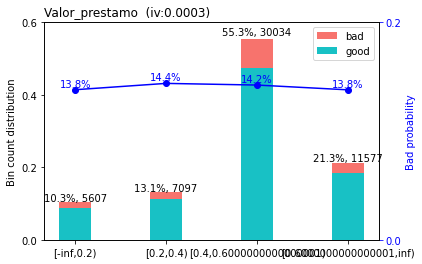

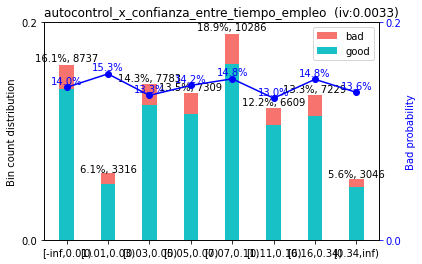

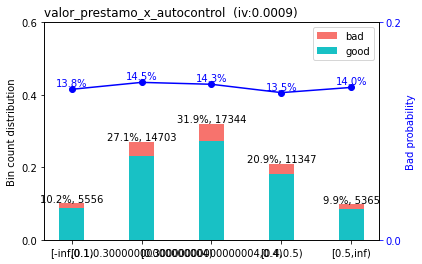

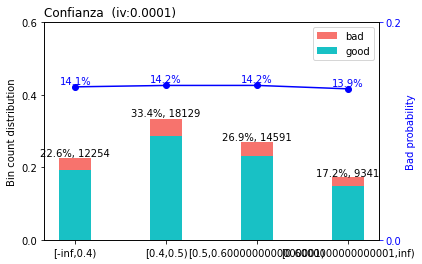

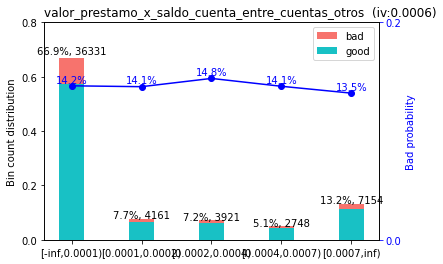

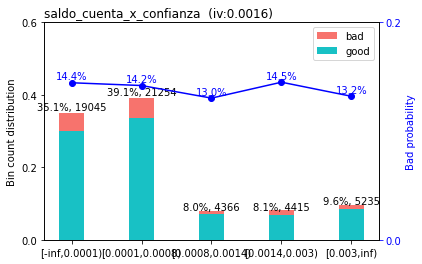

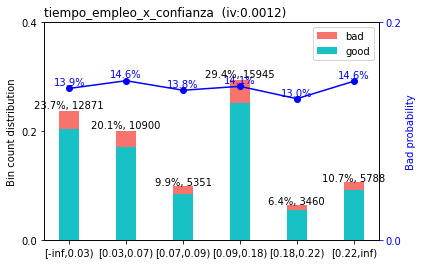

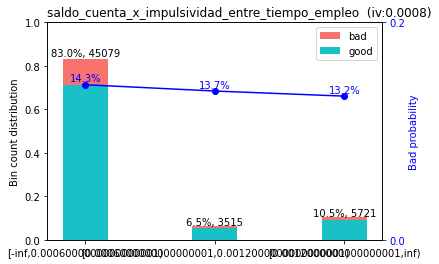

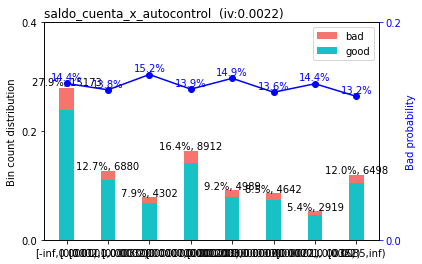

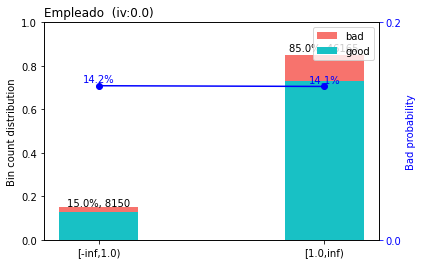

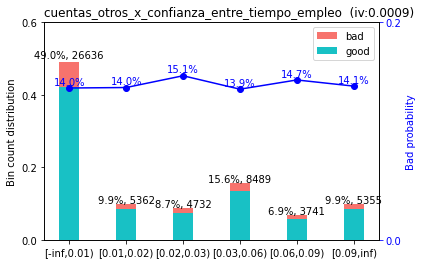

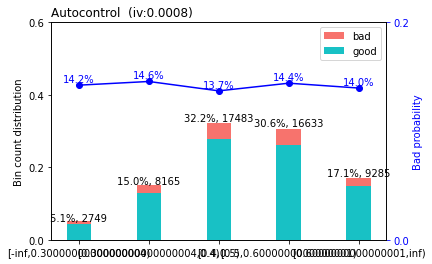

In [13]:
sc.woebin_plot(cortes)

In [14]:
if 'target' in x_train.columns:
    del x_train['target']

In [15]:
x_train.columns == x_valid.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### >> MODELO

In [16]:
import statsmodels.api as sm

#print(help(sm.Logit))

In [34]:
logit_model = sm.Logit(y_train , x_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.406750
         Iterations 9


In [35]:
result =  pd.DataFrame(calcular_pesos(result)).reset_index()
result.columns = ['variable', 'peso']
result.tail(65)

,variable,peso
0,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,0.000011
1,saldo_cuenta_x_impulsividad_entre_cuentas_otros,0.000135
2,cuentas_otros_x_impulsividad,0.000296
3,impulsividad_x_confianza_entre_cuentas_otros,0.013839
4,cuentas_otros_x_saldo_cuenta,0.015517
5,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,0.037017
6,saldo_cuenta_x_autocontrol,0.043818
7,cuentas_otros_x_autocontrol,0.047038
8,tiempo_empleo_x_autocontrol_entre_cuentas_otros,0.070071
9,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,0.124257


In [37]:
result.to_excel('pesos.xlsx', index=False)

In [29]:
result.columns

Index(['pesos'], dtype='object')

In [ ]:
result.summary2()

In [ ]:
import numpy as np
#prediciendo en base al modelo 
y_pred_prob_train = result.predict(x_train)
y_pred_class_train = np.where(y_pred_prob_train < 0.5, 0 , 1)

y_pred_prob_valid = result.predict(x_valid)
y_pred_class_valid = np.where(y_pred_prob_valid < 0.5, 0 , 1)

In [ ]:
y_pred_prob_train.hist()

In [ ]:
y_pred_prob_valid.hist()

#### >>> INDICADORES DE PROBABILIDAD

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [ ]:
auc = roc_auc_score(y_train, y_pred_prob_train)
print("AUC: %1.3f" % auc)
print("GINI: %1.3f" % (2*auc-1))

auc = roc_auc_score(y_valid, y_pred_prob_valid)
print("AUC: %1.3f" % auc)
print("GINI: %1.3f" % (2*auc-1))

#### >>> INDICADORES DE CLASE

In [ ]:
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train))

In [ ]:
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid))

### >> CAMBIO DE PUNTO DE CORTE

In [ ]:
from scipy.optimize import differential_evolution


optimization = differential_evolution(
    lambda c: -1*recall_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_train])), 
    [(0, 1)]
)
optimization

In [ ]:
optimization_auc = differential_evolution(
    lambda c: -1*roc_auc_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_train])), 
    [(0, 1)]
)
optimization_auc

In [ ]:
nuevo_corte = optimization_auc["x"][0]
nuevo_corte

In [ ]:
y_pred_class_train_opt = np.where(y_pred_prob_train < nuevo_corte, 0 , 1)
y_pred_class_valid_opt = np.where(y_pred_prob_valid < nuevo_corte, 0 , 1)

In [ ]:
pd.Series(y_pred_class_train_opt).value_counts()

In [ ]:
y_train.value_counts()

In [ ]:
pd.Series(y_pred_class_valid_opt).value_counts()

In [ ]:
y_valid.value_counts()

In [ ]:
print("/"*25, ' TRAIN')
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train_opt))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train_opt))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train_opt))

print("/"*25, ' VALIDATION')
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid_opt))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid_opt))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid_opt))

In [ ]:
top_iv = [row[0] for row in listado_mayor_prob_corte][:len(cols_aporte) + 5]
top_iv